In [93]:
import pandas
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [94]:
D = pandas.read_csv("Données hospitalières relatives à l'épidémie de COVID-19 - Santé publique France.csv")
print(D)

       reg  cl_age90        jour  hosp  rea  HospConv  SSR_USLD  autres  \
0        1         9  2021-01-03     0    0       NaN       NaN     NaN   
1       44         9  2021-04-01     1    0       1.0       0.0     0.0   
2       75        19  2021-04-14     2    1       0.0       0.0     1.0   
3        4        19  2021-03-02     0    0       NaN       NaN     NaN   
4       52        39  2021-04-04    22    4      18.0       0.0     0.0   
...    ...       ...         ...   ...  ...       ...       ...     ...   
35482    6        49  2021-01-14     0    0       NaN       NaN     NaN   
35483   44         0  2021-05-08  2162  429    1202.0     509.0    22.0   
35484   53        49  2020-12-24    14    3       NaN       NaN     NaN   
35485    2        90  2021-04-25     4    0       4.0       0.0     0.0   
35486   27        69  2021-04-03   232   53     127.0      42.0    10.0   

         rad    dc  
0         21     0  
1        230     1  
2        115     0  
3         34   

In [95]:
D['HospConv'].fillna(D['HospConv'].mean(),inplace=True)
D['SSR_USLD'].fillna(D['SSR_USLD'].mean(),inplace=True)
D['autres'].fillna(D['autres'].mean(),inplace=True)

In [96]:
print(D)

       reg  cl_age90        jour  hosp  rea     HospConv    SSR_USLD  \
0        1         9  2021-01-03     0    0    95.827412   59.806364   
1       44         9  2021-04-01     1    0     1.000000    0.000000   
2       75        19  2021-04-14     2    1     0.000000    0.000000   
3        4        19  2021-03-02     0    0    95.827412   59.806364   
4       52        39  2021-04-04    22    4    18.000000    0.000000   
...    ...       ...         ...   ...  ...          ...         ...   
35482    6        49  2021-01-14     0    0    95.827412   59.806364   
35483   44         0  2021-05-08  2162  429  1202.000000  509.000000   
35484   53        49  2020-12-24    14    3    95.827412   59.806364   
35485    2        90  2021-04-25     4    0     4.000000    0.000000   
35486   27        69  2021-04-03   232   53   127.000000   42.000000   

          autres    rad    dc  
0       2.796091     21     0  
1       0.000000    230     1  
2       1.000000    115     0  
3      

In [97]:
print(D.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35487 entries, 0 to 35486
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   reg       35487 non-null  int64  
 1   cl_age90  35487 non-null  int64  
 2   jour      35487 non-null  object 
 3   hosp      35487 non-null  int64  
 4   rea       35487 non-null  int64  
 5   HospConv  35487 non-null  float64
 6   SSR_USLD  35487 non-null  float64
 7   autres    35487 non-null  float64
 8   rad       35487 non-null  int64  
 9   dc        35487 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.7+ MB
None


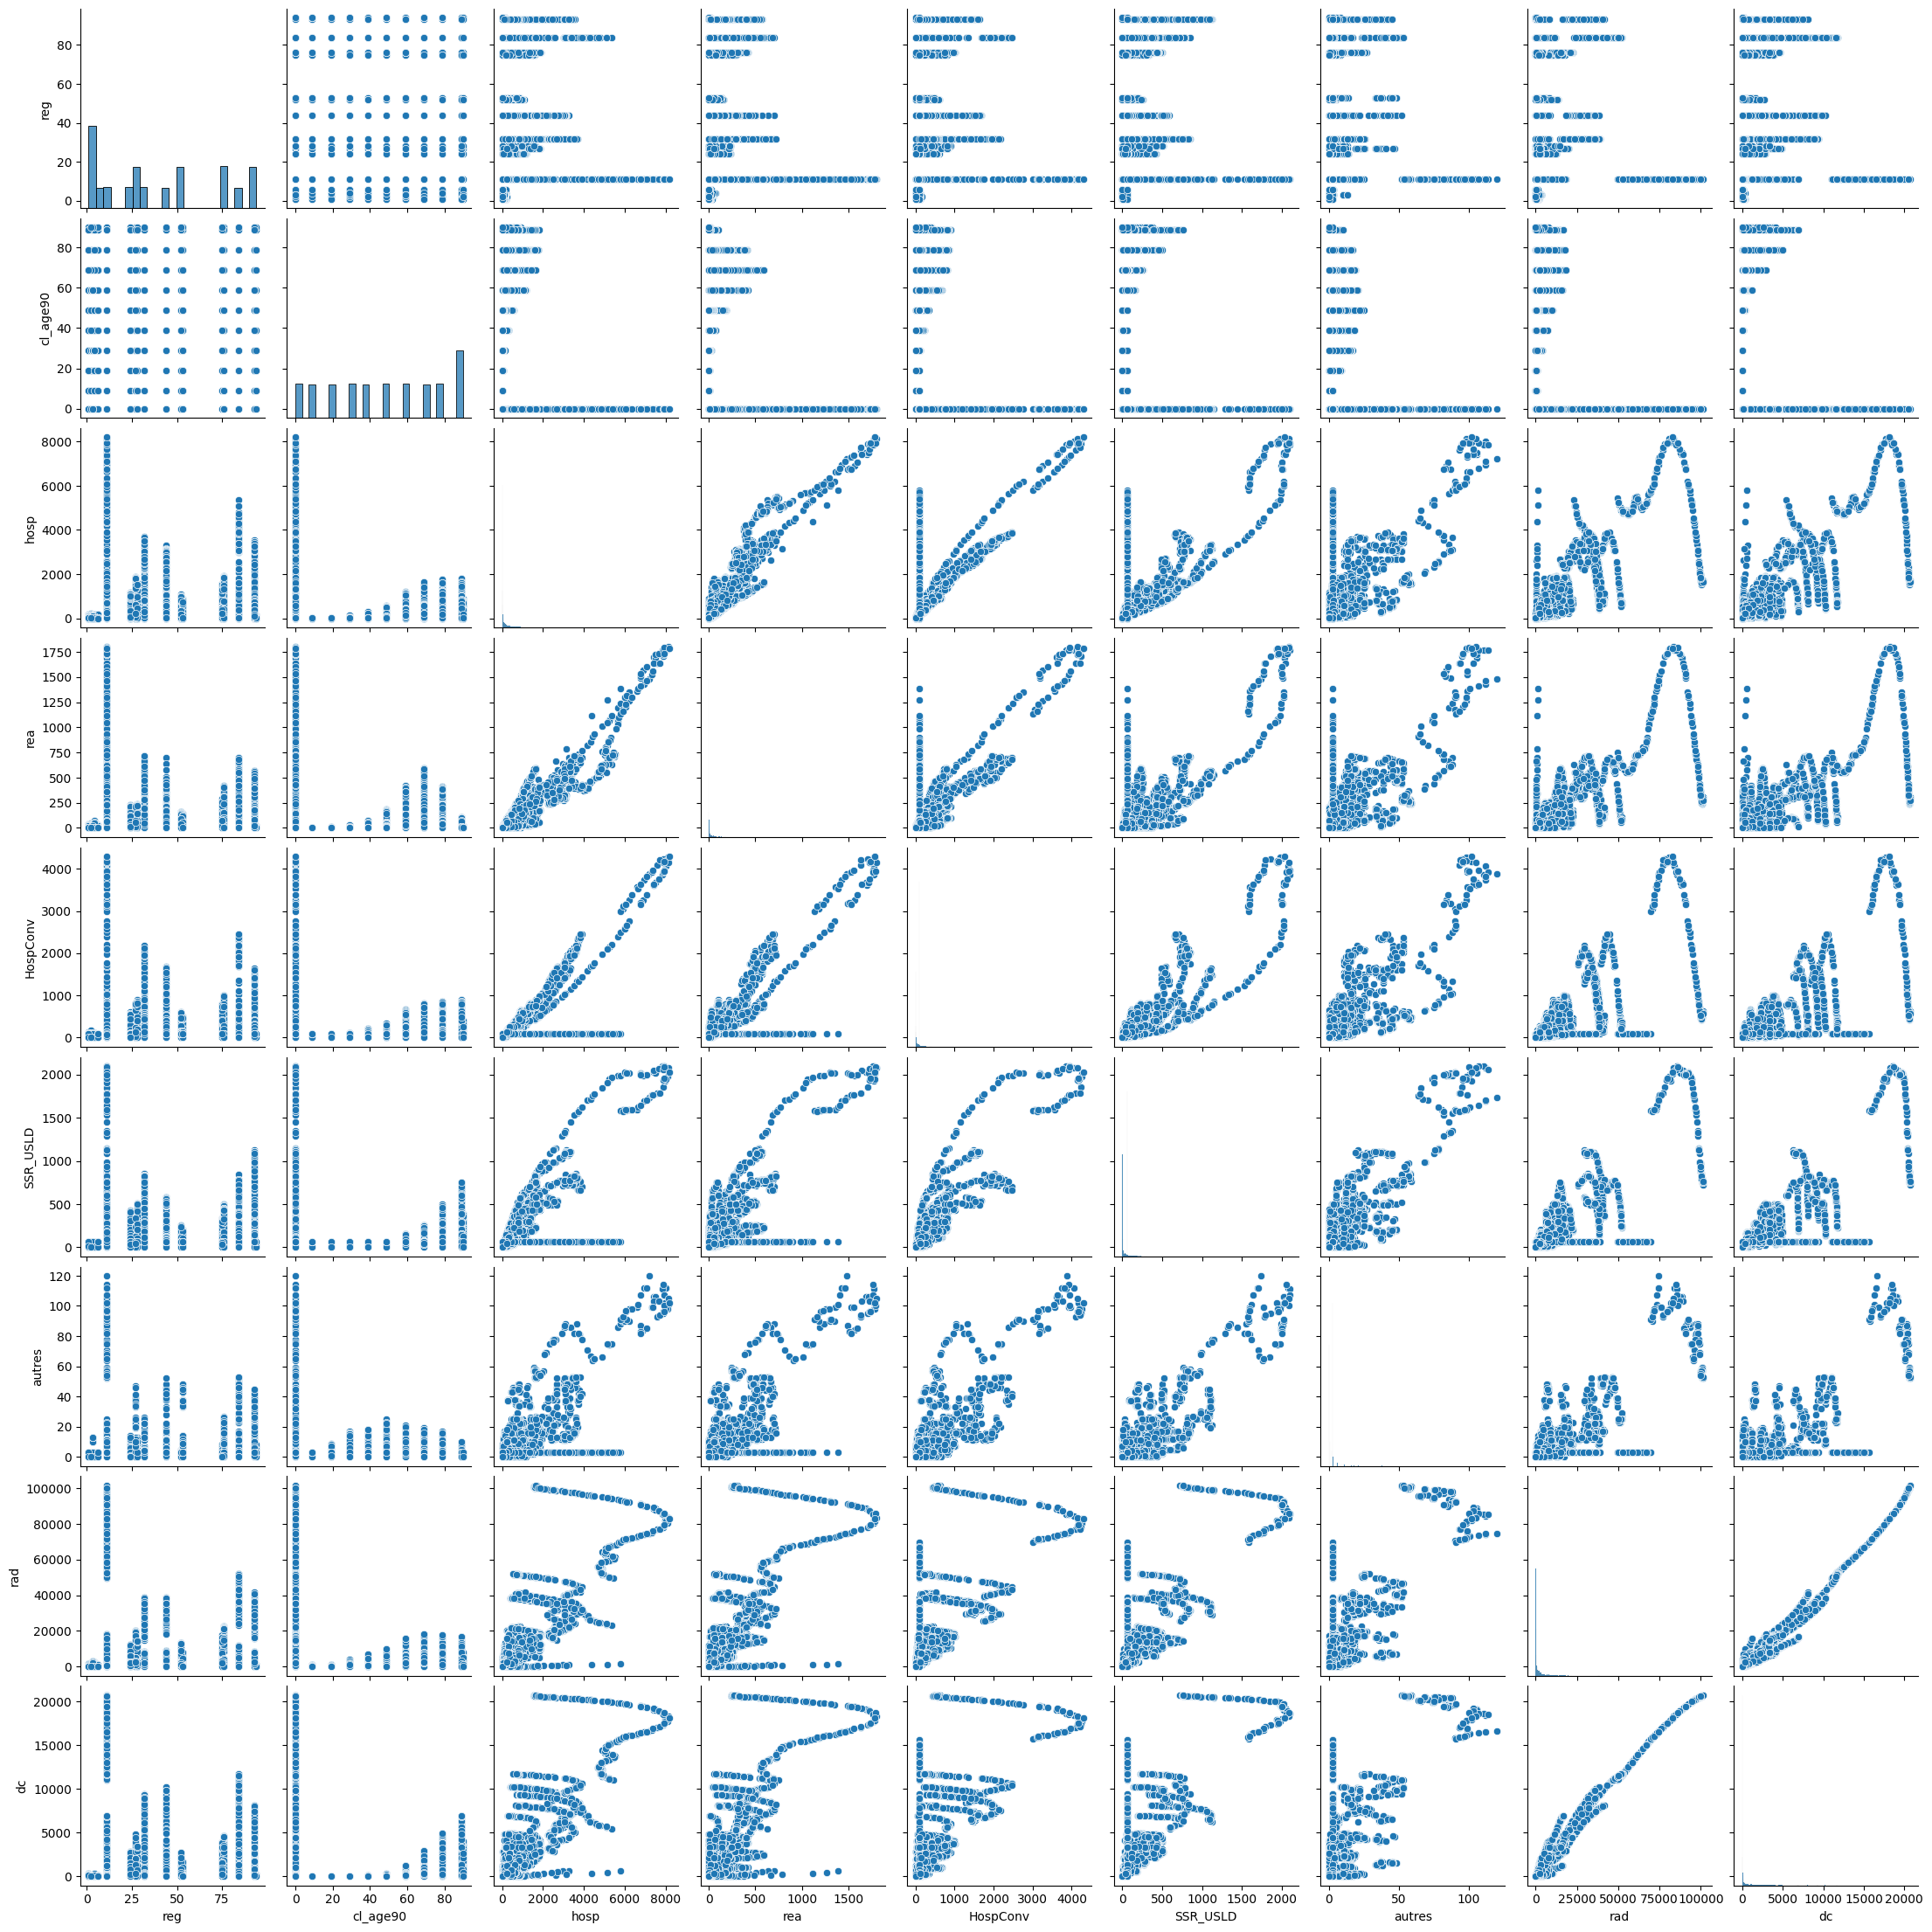

In [98]:
sns.pairplot(D)

In [99]:
n = D.shape[0] 

In [100]:
moyennes = np.mean(D,axis=0)
print(moyennes)

reg           39.403021
cl_age90      48.215600
hosp         214.530758
rea           32.517795
HospConv      95.827412
SSR_USLD      59.806364
autres         2.796091
rad         2909.988277
dc           666.775721
dtype: float64


C:\Users\sihah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [101]:
sigmas = np.std(D,axis=0,ddof=0)
print(sigmas)

reg           32.268679
cl_age90      30.268600
hosp         573.448767
rea           98.822208
HospConv     209.977195
SSR_USLD     123.168712
autres         6.113419
rad         7864.154725
dc          1862.293403
dtype: float64


C:\Users\sihah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [102]:
data_without_day = D.drop(['jour'], axis=1)

In [103]:
Z = ( data_without_day - moyennes)/sigmas
print(pandas.DataFrame(Z))

            reg  cl_age90      hosp       rea      HospConv      SSR_USLD  \
0     -1.190102 -1.295587 -0.374106 -0.329054  6.767809e-17 -5.768857e-17   
1      0.142459 -1.295587 -0.372362 -0.329054 -4.516081e-01 -4.855646e-01   
2      1.103143 -0.965211 -0.370619 -0.318934 -4.563706e-01 -4.855646e-01   
3     -1.097133 -0.965211 -0.374106 -0.329054  6.767809e-17 -5.768857e-17   
4      0.390378 -0.304461 -0.335742 -0.288577 -3.706470e-01 -4.855646e-01   
...         ...       ...       ...       ...           ...           ...   
35482 -1.035153  0.025915 -0.374106 -0.329054  6.767809e-17 -5.768857e-17   
35483  0.142459 -1.592925  3.396065  4.012076  5.268061e+00  3.646978e+00   
35484  0.421368  0.025915 -0.349693 -0.298696  6.767809e-17 -5.768857e-17   
35485 -1.159112  1.380454 -0.367131 -0.329054 -4.373209e-01 -4.855646e-01   
35486 -0.384367  0.686665  0.030463  0.207263  1.484570e-01 -1.445689e-01   

         autres       rad        dc  
0      0.000000 -0.367362 -0.358040  

In [104]:
acp = PCA()
coord = acp.fit_transform(Z)

In [105]:
print(pandas.DataFrame(coord,data_without_day.index))

               0         1         2         3         4         5         6  \
0      -0.492402 -1.703453 -0.499050 -0.398717 -0.030002 -0.206293 -0.081736   
1      -0.951512 -0.537597 -1.270765  0.086008  0.005036 -0.132937  0.024734   
2      -0.888590  0.443168 -1.474522 -0.066603 -0.025754  0.030849  0.012143   
3      -0.512286 -1.456066 -0.265461 -0.393166 -0.027843 -0.169719 -0.071035   
4      -0.944974  0.177798 -0.548519  0.096938  0.064928 -0.034649  0.054647   
...          ...       ...       ...       ...       ...       ...       ...   
35482  -0.578355 -0.899707  0.545128 -0.355979 -0.022676 -0.061993 -0.041667   
35483  10.882096 -0.560506 -0.481997 -0.101419 -0.041782 -0.988379 -0.082474   
35484  -0.502057  0.348623 -0.192943 -0.468263 -0.001563 -0.039471 -0.012540   
35485  -1.190358 -0.294460  1.663105  0.300546  0.043441  0.141395  0.065877   
35486   0.358585 -0.068008  0.779942 -0.547957 -0.045980  1.028901 -0.146541   

              7         8  
0     -0.05

In [106]:
X = data_without_day.values
V = np.cov(X,ddof=0,rowvar=False)
np.set_printoptions(precision=2,suppress=True)
print(V)

[[    1041.27       -0.97     1493.83      167.82      296.05      210.44
         7.19    17575.32     4139.66]
 [      -0.97      916.19    -2261.24     -466.15     -633.57     -291.01
       -29.4    -39773.98    -4851.89]
 [    1493.83    -2261.24   328843.49    52341.97    84864.51    47951.97
      2036.86  3633162.29   867634.52]
 [     167.82     -466.15    52341.97     9765.83    16458.9      8865.58
       408.15   608999.96   134887.43]
 [     296.05     -633.57    84864.51    16458.9     44090.42    23319.85
       995.34  1076205.4    253942.8 ]
 [     210.44     -291.01    47951.97     8865.58    23319.85    15170.53
       596.     742502.85   176549.27]
 [       7.19      -29.4      2036.86      408.15      995.34      596.
        37.37    34575.5      7411.97]
 [   17575.32   -39773.98  3633162.29   608999.96  1076205.4    742502.85
     34575.5  61844929.53 14101131.57]
 [    4139.66    -4851.89   867634.52   134887.43   253942.8    176549.27
      7411.97 14101131.5

In [107]:
R = np.corrcoef(X,rowvar=False)
print(R)

[[ 1.   -0.    0.08  0.05  0.04  0.05  0.04  0.07  0.07]
 [-0.    1.   -0.13 -0.16 -0.1  -0.08 -0.16 -0.17 -0.09]
 [ 0.08 -0.13  1.    0.92  0.7   0.68  0.58  0.81  0.81]
 [ 0.05 -0.16  0.92  1.    0.79  0.73  0.68  0.78  0.73]
 [ 0.04 -0.1   0.7   0.79  1.    0.9   0.78  0.65  0.65]
 [ 0.05 -0.08  0.68  0.73  0.9   1.    0.79  0.77  0.77]
 [ 0.04 -0.16  0.58  0.68  0.78  0.79  1.    0.72  0.65]
 [ 0.07 -0.17  0.81  0.78  0.65  0.77  0.72  1.    0.96]
 [ 0.07 -0.09  0.81  0.73  0.65  0.77  0.65  0.96  1.  ]]


<AxesSubplot: >

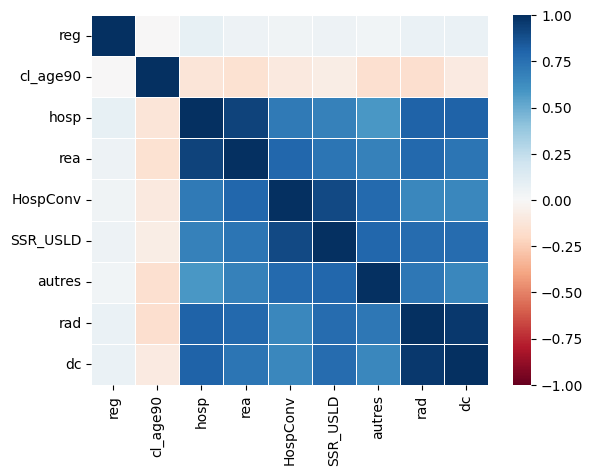

In [108]:
sns.heatmap(R,xticklabels=data_without_day.columns,yticklabels=data_without_day.columns,vmin=-1,vmax=+1,center=0,cmap="RdBu",linewidths=0.5)

In [109]:
sol = np.linalg.eig(R)
print(sol)

(array([5.56, 1.  , 0.98, 0.64, 0.44, 0.24, 0.01, 0.06, 0.06]), array([[ 0.03, -0.86, -0.51, -0.09, -0.  ,  0.01, -0.01, -0.01,  0.01],
       [-0.07, -0.51,  0.85,  0.04, -0.01,  0.11,  0.03, -0.03,  0.01],
       [ 0.38, -0.03, -0.01,  0.41, -0.41,  0.08,  0.28,  0.58, -0.31],
       [ 0.38,  0.02, -0.01,  0.17, -0.52,  0.26, -0.37, -0.59,  0.  ],
       [ 0.37,  0.01,  0.09, -0.45, -0.32, -0.32,  0.16,  0.16,  0.63],
       [ 0.38, -0.02,  0.11, -0.36,  0.12, -0.5 , -0.01, -0.17, -0.65],
       [ 0.35,  0.06,  0.01, -0.48,  0.28,  0.71, -0.07,  0.2 , -0.08],
       [ 0.39, -0.  , -0.03,  0.32,  0.42,  0.05,  0.62, -0.39,  0.18],
       [ 0.38, -0.05,  0.05,  0.37,  0.43, -0.22, -0.61,  0.25,  0.23]]))


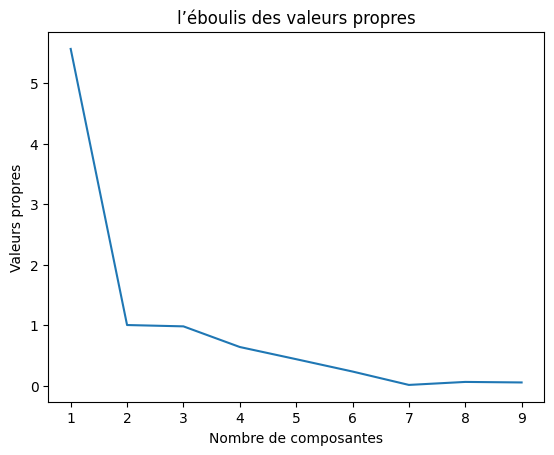

In [110]:
plt.plot(np.arange(1,data_without_day.shape[1]+1), sol[0])
plt.title("l’éboulis des valeurs propres")
plt.ylabel("Valeurs propres")
plt.xlabel("Nombre de composantes")
plt.show()

In [111]:
c1 = np.dot(Z,sol[1][:,0])
c2 = np.dot(Z,sol[1][:,1])

In [112]:
dt = {'F_1':c1,'F_2':c2}

In [113]:
comp_principale =pandas.DataFrame(dt,index=data_without_day.index)
print(comp_principale)

             F_1       F_2
0      -0.492402  1.703453
1      -0.951512  0.537597
2      -0.888590 -0.443168
3      -0.512286  1.456066
4      -0.944974 -0.177798
...          ...       ...
35482  -0.578355  0.899707
35483  10.882096  0.560506
35484  -0.502057 -0.348623
35485  -1.190358  0.294460
35486   0.358585  0.068008

[35487 rows x 2 columns]


In [114]:
r_1 = np.sqrt(sol[0][0])*sol[1][:,0]
r_2 = np.sqrt(sol[0][1])*sol[1][:,1]

In [115]:
dc ={'r_1':r_1,'r_2':r_2}

In [116]:
print(pandas.DataFrame(dc,index=data_without_day.columns))

               r_1       r_2
reg       0.079124 -0.858519
cl_age90 -0.170289 -0.508539
hosp      0.886723 -0.033637
rea       0.907036  0.017027
HospConv  0.877051  0.009680
SSR_USLD  0.903002 -0.017477
autres    0.831524  0.061210
rad       0.916655 -0.002762
dc        0.896821 -0.050580


In [117]:
from fanalysis.pca import PCA
acp = PCA(std_unit=True,row_labels=data_without_day.index,col_labels=data_without_day.columns)
acp.fit(X)
print(pandas.DataFrame(acp.col_coord_[:,:2],index=data_without_day.columns))

                 0         1
reg       0.079124 -0.858519
cl_age90 -0.170289 -0.508539
hosp      0.886723 -0.033637
rea       0.907036  0.017027
HospConv  0.877051  0.009680
SSR_USLD  0.903002 -0.017477
autres    0.831524  0.061210
rad       0.916655 -0.002762
dc        0.896821 -0.050580


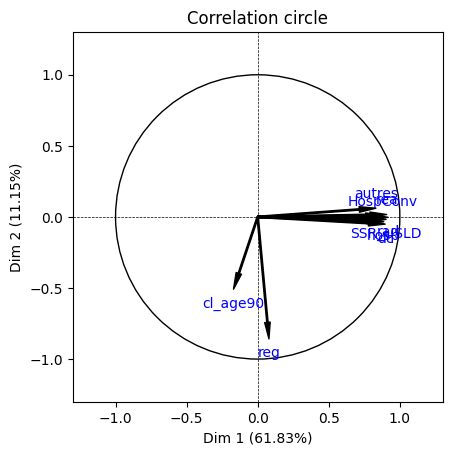

In [118]:
acp.correlation_circle(num_x_axis=1,num_y_axis=2)

In [119]:
print(pandas.DataFrame(acp.col_cos2_[:,:2],index=data_without_day.columns))

                 0         1
reg       0.006261  0.737055
cl_age90  0.028998  0.258612
hosp      0.786277  0.001131
rea       0.822714  0.000290
HospConv  0.769219  0.000094
SSR_USLD  0.815413  0.000305
autres    0.691432  0.003747
rad       0.840256  0.000008
dc        0.804288  0.002558


In [120]:
print(pandas.DataFrame(np.cumsum(acp.col_cos2_[:,:2],axis=1),index=data_without_day.columns))

                 0         1
reg       0.006261  0.743316
cl_age90  0.028998  0.287610
hosp      0.786277  0.787409
rea       0.822714  0.823004
HospConv  0.769219  0.769313
SSR_USLD  0.815413  0.815719
autres    0.691432  0.695179
rad       0.840256  0.840264
dc        0.804288  0.806846


In [121]:
contr_variable =pandas.DataFrame(acp.col_contrib_[:,:2],index=data_without_day.columns)
print(contr_variable)

                  0          1
reg        0.112502  73.426479
cl_age90   0.521095  25.763291
hosp      14.129330   0.112713
rea       14.784098   0.028883
HospConv  13.822792   0.009335
SSR_USLD  14.652901   0.030429
autres    12.424974   0.373246
rad       15.099331   0.000760
dc        14.452977   0.254862


In [122]:
contr_individu = pandas.DataFrame(acp.row_contrib_[:,:2],index=data_without_day.index)
print(contr_individu)

              0         1
0      0.000123  0.008146
1      0.000458  0.000811
2      0.000400  0.000551
3      0.000133  0.005952
4      0.000452  0.000089
...         ...       ...
35482  0.000169  0.002272
35483  0.059966  0.000882
35484  0.000128  0.000341
35485  0.000718  0.000243
35486  0.000065  0.000013

[35487 rows x 2 columns]


In [123]:
contr_individu.to_csv("contr_ind.csv",index=False)
contr_variable.to_csv("contr_var.csv",index=False)
comp_principale.to_csv("compostante.csv",index=False)